<a href="https://colab.research.google.com/github/dzhamalovas/ML/blob/main/ML3_4_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача классификации


## Подготовка и визуализация

In [ ]:
# импорт библиотек
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.datasets import make_blobs

In [ ]:
RANDOM_SEED = 42

Text(0, 0.5, 'X2')

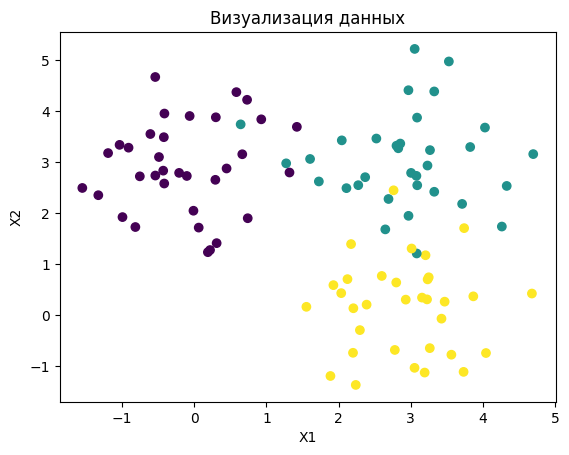

In [ ]:
X, y = make_blobs(n_samples=100, centers=[(0,3),(3,3),(3,0)],
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(0.9,0.9,0.9))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')

## Модель

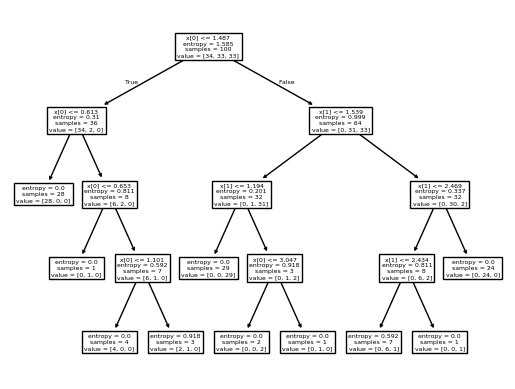

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Обучение модели
depth = 4
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=RANDOM_SEED)
clf_tree.fit(X, y)

# Построение дерева
plot_tree(clf_tree)
plt.show()


Дерево решений помогает шаг за шагом разделять данные, чтобы точно определить их класс

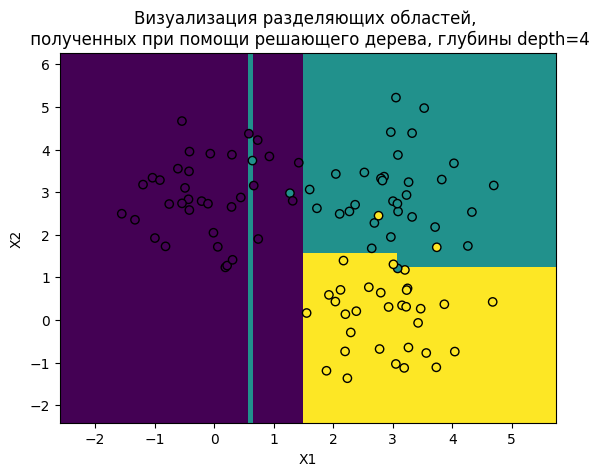

In [ ]:
# Границы принятия решений
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score


In [ ]:
# Качество модели
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

[[34  0  0]
 [ 1 32  0]
 [ 0  1 32]]
Accuracy = 0.98
F1_score = 0.98


## Новое наблюдение

In [ ]:
observation_new = [[2, 1]]

In [ ]:
clf_tree.predict(observation_new)

array([2])

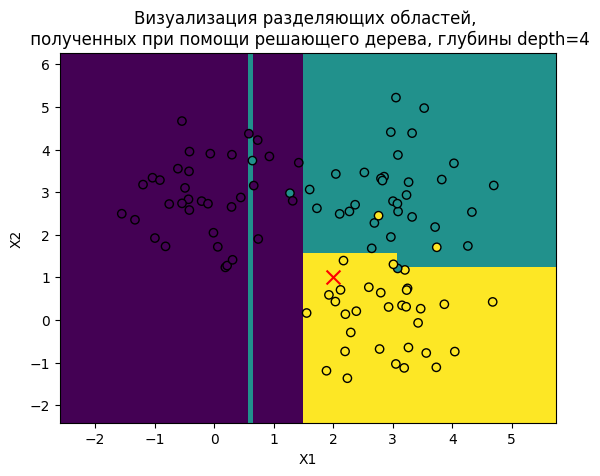

In [ ]:
# Границы принятия решений
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.scatter(observation_new[0][0], observation_new[0][1], color='red', marker='x', s=100, label="Новое наблюдение")
plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Задача регрессии


## Генерация и визуализация

In [ ]:
n_samples = 100
X = np.sort(np.random.rand(n_samples))
y = np.exp(X ** 2)+np.random.normal(0.0, 0.1, X.shape[0])

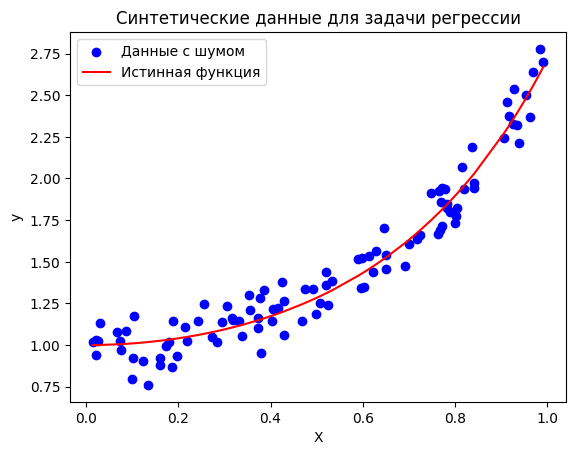

In [ ]:
plt.scatter(X, y, color="blue", label="Данные с шумом")
plt.plot(X, np.exp(X ** 2), color="red", label="Истинная функция")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Синтетические данные для задачи регрессии")
plt.legend()
plt.show()

## Объект регрессора

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree


In [ ]:
# Генерация синтетических данных
n_samples = 100
X = np.sort(np.random.rand(n_samples)).reshape(-1, 1)  # 2D массив
y = np.exp(X ** 2).ravel() + np.random.normal(0.0, 0.1, X.shape[0])  # 1D массив

# Проверка форматов
print("Shape of X:", X.shape)  # Должно быть (100, 1)
print("Shape of y:", y.shape)  # Должно быть (100,)

# Создание и обучение регрессора на основе дерева решений
depth = 3
reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=RANDOM_SEED)
reg_tree.fit(X, y)



Shape of X: (100, 1)
Shape of y: (100,)


DecisionTreeRegressor(max_depth=3, random_state=42)

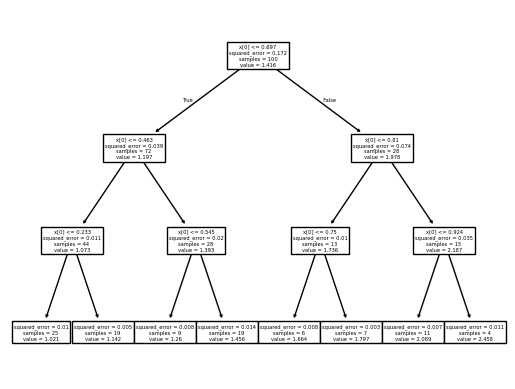

In [ ]:
# Построение дерева
plot_tree(reg_tree)
plt.show()

In [ ]:
y_pred_reg = reg_tree.predict(X)


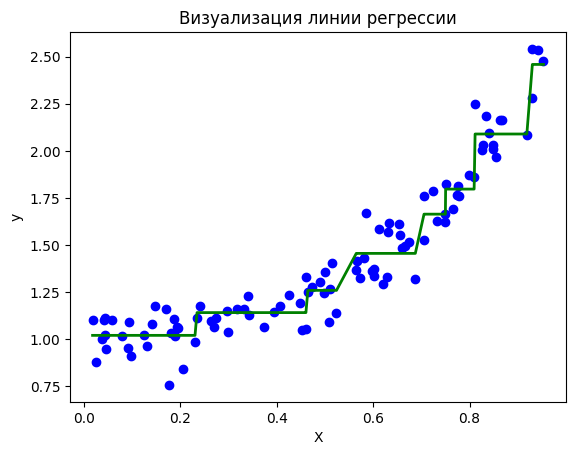

In [ ]:
plt.scatter(X, y, c="b")

plt.plot(X, y_pred_reg, "g", lw=2)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y');

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Качество работы модели
print('r2= ', r2_score(y, y_pred_reg))
print('MSE= ', mean_squared_error(y, y_pred_reg))

r2=  0.9495459903438862
MSE=  0.008654551531710214


## Новое предсказание

In [ ]:
observation_new = [[0.7]]

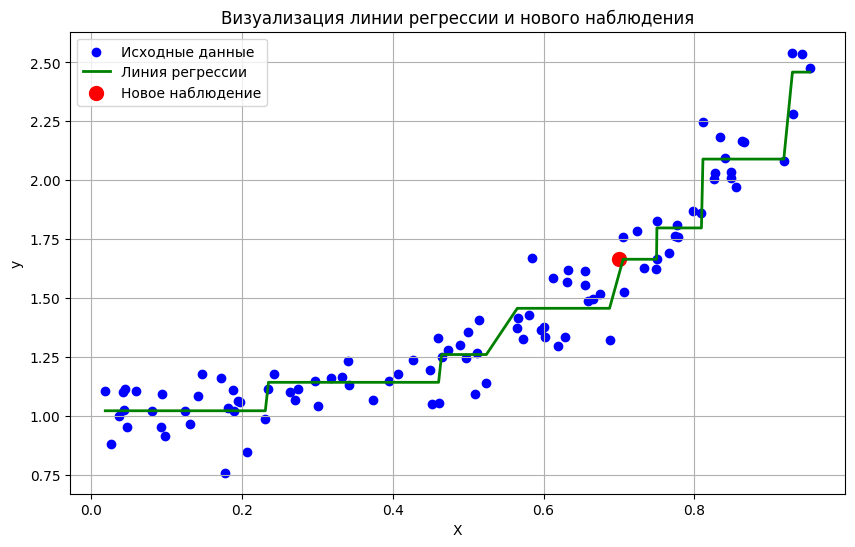

In [ ]:
y_new_pred = reg_tree.predict(observation_new)  # Предсказание для нового наблюдения

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c="b", label='Исходные данные')
plt.plot(X, y_pred_reg, "g", lw=2, label='Линия регрессии')
plt.scatter(observation_new, y_new_pred, c='r', s=100, label='Новое наблюдение')

# Настройка графика
plt.title('Визуализация линии регрессии и нового наблюдения')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()  # Добавление легенды
plt.grid(True)  # Добавление сетки для лучшей читабельности
plt.show()

# Задания для самостоятельного выполнения

## 1. Загрузите встроенные данные sklearn.datasets.load_iris, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.

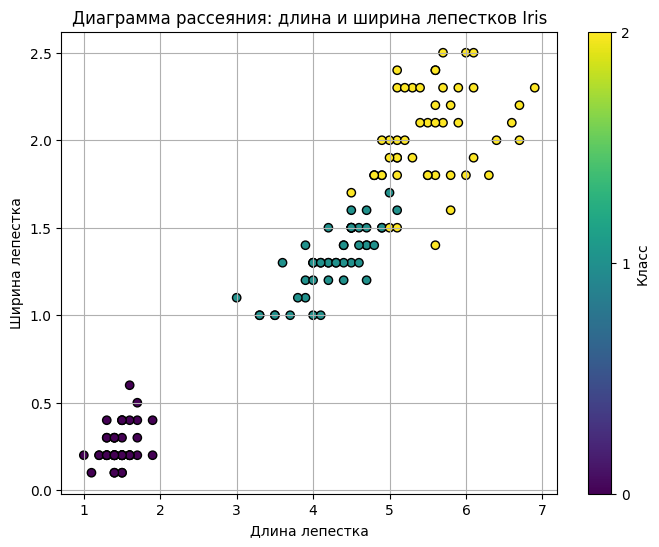

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Загрузка данных Iris
iris = load_iris()
X = iris.data[:, 2:4]  # последние два столбца: длина и ширина лепестков
y = iris.target  # метки классов

# Визуализация на диаграмме рассеяния
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Диаграмма рассеяния: длина и ширина лепестков Iris')
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Класс')
plt.grid(True)
plt.show()


## 2. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева принятия решений.

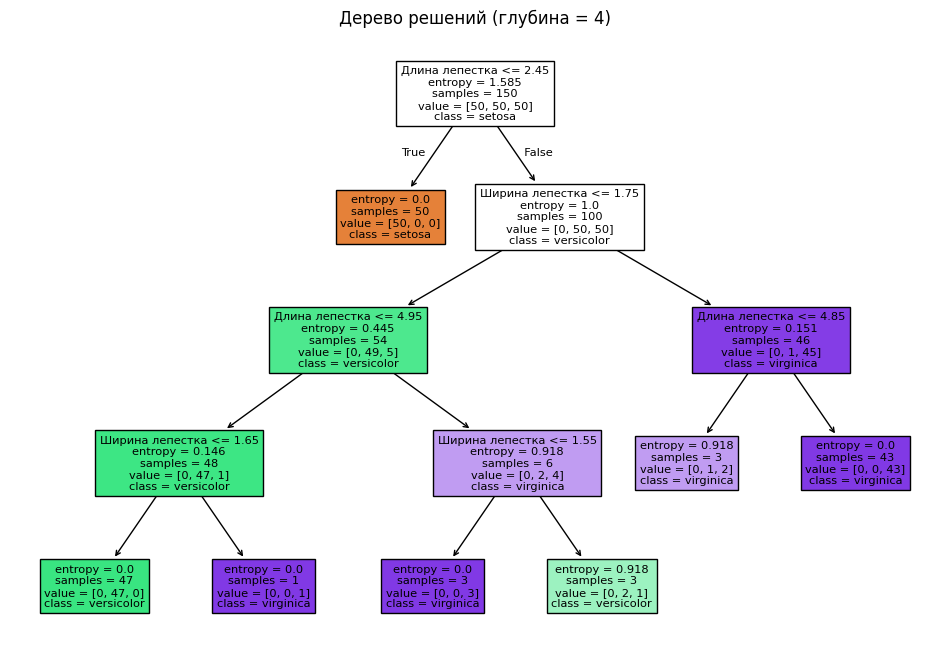

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Обучение модели с глубиной 4
dt_classifier = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=42)
dt_classifier.fit(X, y)

# Визуализация дерева решений
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=['Длина лепестка', 'Ширина лепестка'], class_names=iris.target_names)
plt.title('Дерево решений (глубина = 4)')
plt.show()


## 3. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier с разными глубинами (1, 2, 3, 4, 10), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области.

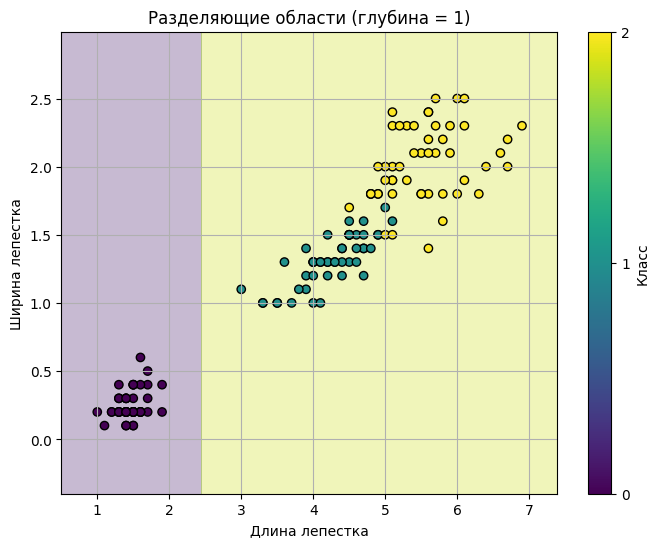

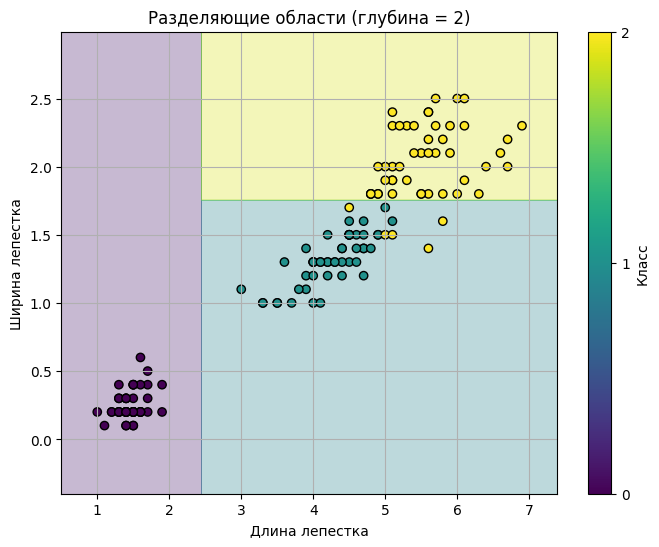

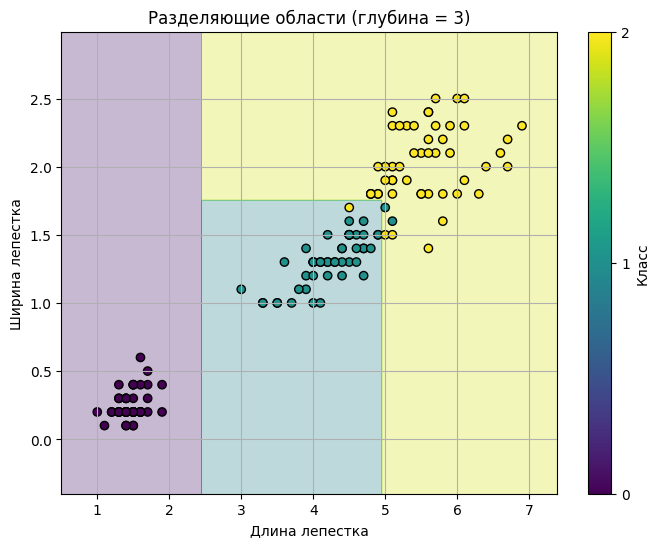

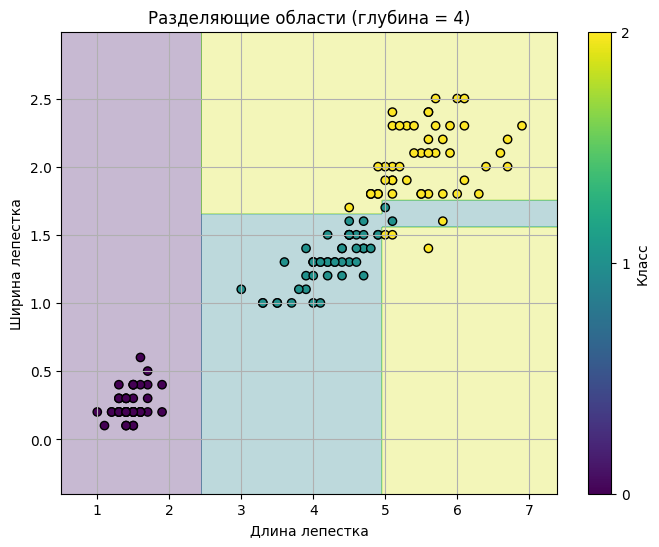

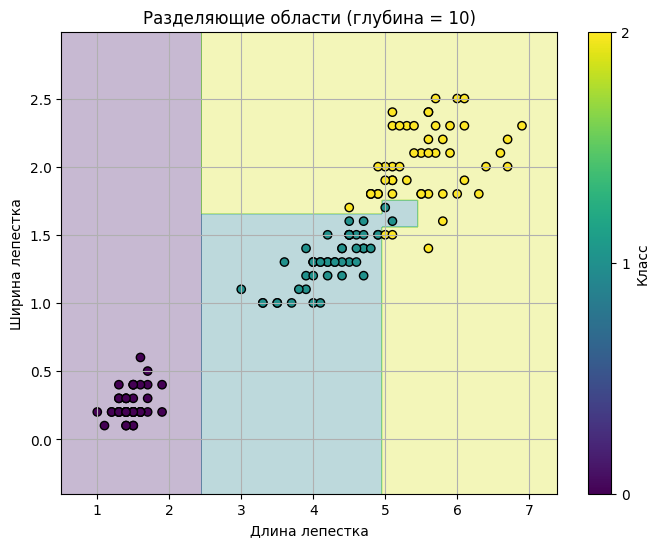

In [ ]:
# Функция для визуализации разделяющих областей
def plot_decision_boundaries(classifier, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis')
    plt.title(title)
    plt.xlabel('Длина лепестка')
    plt.ylabel('Ширина лепестка')
    plt.colorbar(scatter, ticks=[0, 1, 2], label='Класс')
    plt.grid(True)
    plt.show()

# Обучение и визуализация для разных глубин
depths = [1, 2, 3, 4, 10]
for depth in depths:
    classifier = DecisionTreeClassifier(max_depth=depth, criterion='entropy', random_state=42)
    classifier.fit(X, y)
    plot_decision_boundaries(classifier, X, y, f'Разделяющие области (глубина = {depth})')


## 4. Выведите необходимые метрики для оценки работы моделей с разными глубинами. Сделайте вывод о том, какая модель лучше классифицирует данные.

In [ ]:
from sklearn.metrics import accuracy_score

# Оценка моделей и вывод метрик
for depth in depths:
    classifier = DecisionTreeClassifier(max_depth=depth, criterion='entropy', random_state=42)
    classifier.fit(X, y)
    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f'Глубина: {depth}, Точность: {accuracy:.2f}')


Глубина: 1, Точность: 0.67
Глубина: 2, Точность: 0.96
Глубина: 3, Точность: 0.97
Глубина: 4, Точность: 0.99
Глубина: 10, Точность: 0.99


Чем больше глубина, тем выше точность

## 5. Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.

Точность модели на полном наборе данных: 0.99


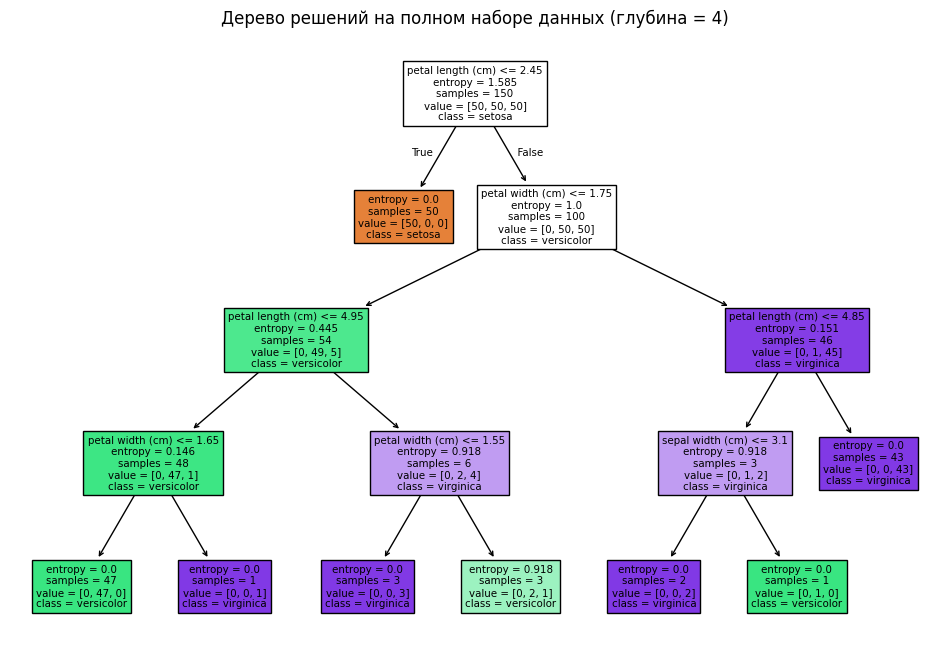

In [ ]:
X_full = iris.data
y_full = iris.target

# Обучение модели на всем наборе данных
dt_classifier_full = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=42)
dt_classifier_full.fit(X_full, y_full)

# Оценка качества модели
y_full_pred = dt_classifier_full.predict(X_full)
full_accuracy = accuracy_score(y_full, y_full_pred)
print(f'Точность модели на полном наборе данных: {full_accuracy:.2f}')

# Визуализация дерева решений
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier_full, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title('Дерево решений на полном наборе данных (глубина = 4)')
plt.show()


## 6. Загрузите встроенные данные sklearn.datasets.california_housing, взяв только столбец AveBedrms в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Загрузка данных
california_housing = fetch_california_housing()
X = california_housing.data[:, 3].reshape(-1, 1)  # Столбец AveBedrms
y = california_housing.target  # Целевая переменная (меданная цена домов)

# Преобразование в DataFrame для удобства
data = pd.DataFrame(data=X, columns=['AveBedrms'])
data['MedHouseVal'] = y


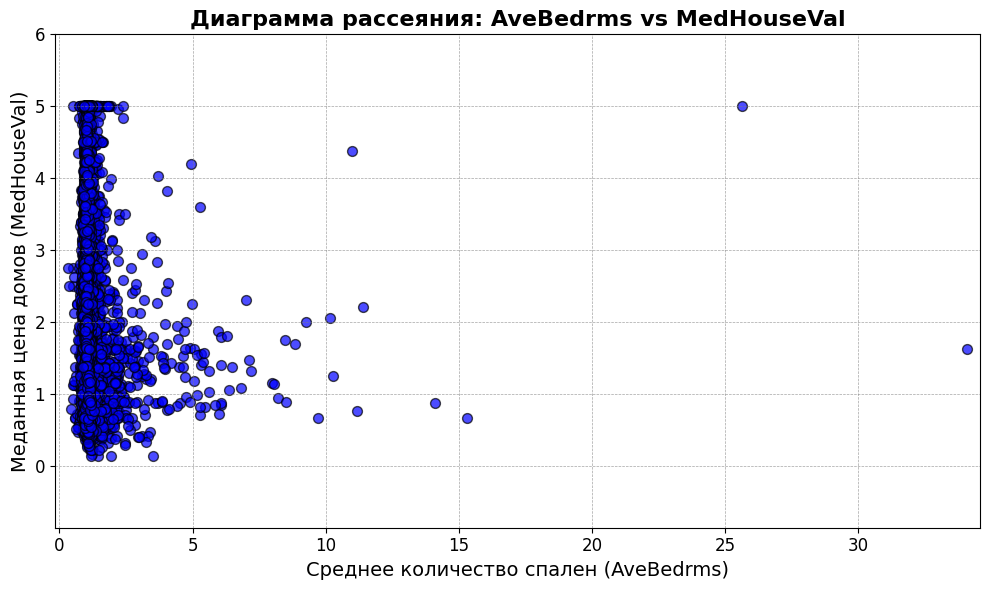

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(data['AveBedrms'], data['MedHouseVal'],
            alpha=0.7, edgecolor='k', s=50, c='blue', marker='o')

plt.title('Диаграмма рассеяния: AveBedrms vs MedHouseVal', fontsize=16, fontweight='bold')
plt.xlabel('Среднее количество спален (AveBedrms)', fontsize=14)
plt.ylabel('Меданная цена домов (MedHouseVal)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.xlim(data['AveBedrms'].min() - 0.5, data['AveBedrms'].max() + 0.5)
plt.ylim(data['MedHouseVal'].min() - 1, data['MedHouseVal'].max() + 1)

plt.tight_layout()
plt.show()


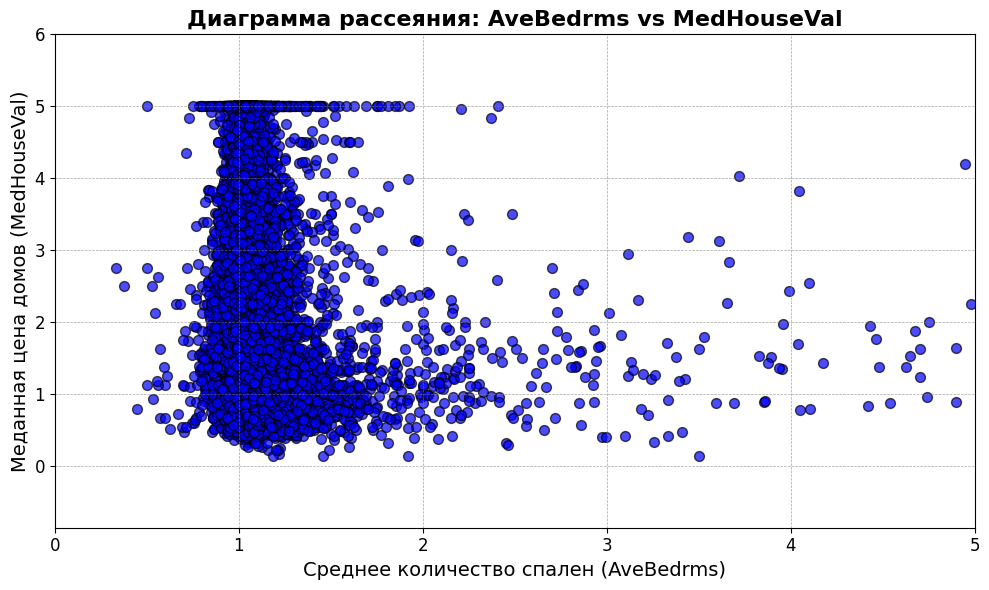

In [ ]:
# Улучшение просматриваемости
plt.figure(figsize=(10, 6))

plt.scatter(data['AveBedrms'], data['MedHouseVal'],
            alpha=0.7, edgecolor='k', s=50, c='blue', marker='o')

plt.title('Диаграмма рассеяния: AveBedrms vs MedHouseVal', fontsize=16, fontweight='bold')
plt.xlabel('Среднее количество спален (AveBedrms)', fontsize=14)
plt.ylabel('Меданная цена домов (MedHouseVal)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.xlim(0, 5)
plt.ylim(data['MedHouseVal'].min() - 1, data['MedHouseVal'].max() + 1)

plt.tight_layout()
plt.show()


## 7. Обучите модель регрессионного дерева принятия решений sklearn.tree.DecisionTreeRegressor, зафиксировав random_state=0, а остальными гиперпараметрами по умолчению.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Обучение модели регрессионного дерева
reg_tree = DecisionTreeRegressor(random_state=0)
reg_tree.fit(X, y)


DecisionTreeRegressor(random_state=0)

## 8. Визуализируйте соответствующий граф дерева решений и получившуюся кусочную линию регрессии.


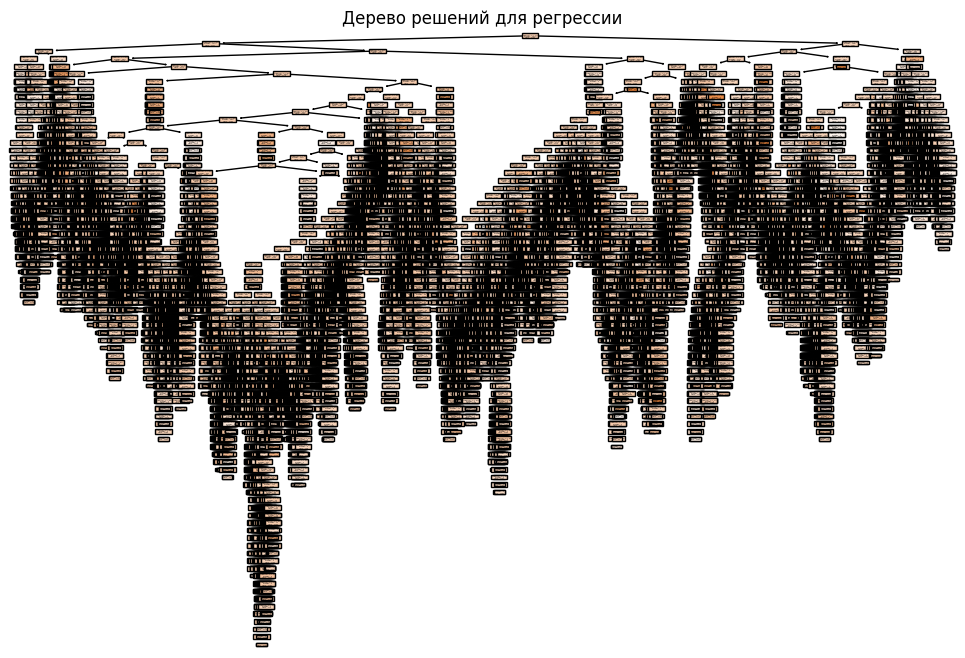

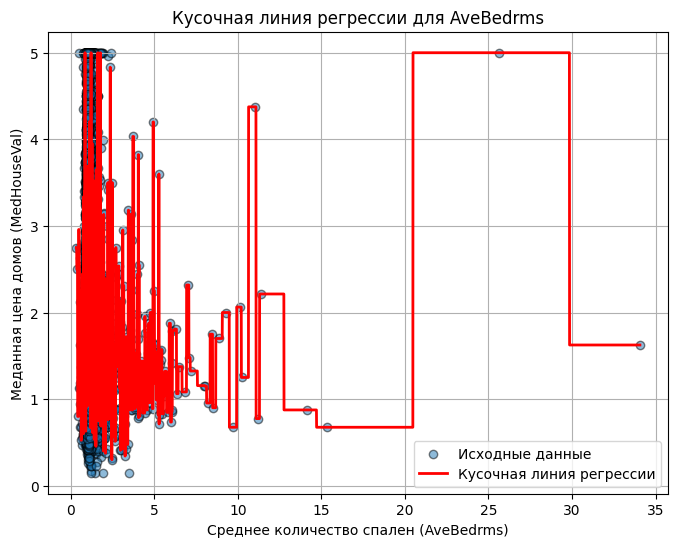

In [ ]:
import numpy as np

# Визуализация дерева решений
plt.figure(figsize=(12, 8))
plot_tree(reg_tree, filled=True, feature_names=['AveBedrms'], impurity=False)
plt.title('Дерево решений для регрессии')
plt.show()

# Предсказания для визуализации кусочной линии регрессии
X_range = np.arange(X.min(), X.max(), 0.01).reshape(-1, 1)
y_pred = reg_tree.predict(X_range)

# Визуализация кусочной линии регрессии
plt.figure(figsize=(8, 6))
plt.scatter(data['AveBedrms'], data['MedHouseVal'], alpha=0.5, edgecolor='k', label='Исходные данные')
plt.plot(X_range, y_pred, color='r', lw=2, label='Кусочная линия регрессии')
plt.title('Кусочная линия регрессии для AveBedrms')
plt.xlabel('Среднее количество спален (AveBedrms)')
plt.ylabel('Меданная цена домов (MedHouseVal)')
plt.legend()
plt.grid(True)
plt.show()


## 9. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Оценка качества работы модели
y_pred_train = reg_tree.predict(X)
mse = mean_squared_error(y, y_pred_train)
r2 = r2_score(y, y_pred_train)

print(f'Обучающая средняя квадратичная ошибка: {mse:.2f}')
print(f'Обучающий коэффициент детерминации (R^2): {r2:.2f}')

# Создание нового наблюдения
observation_new = [[2.0]]  # Например, среднее количество спален = 2.0
y_new_pred = reg_tree.predict(observation_new)

print(f'Предсказанная меданная цена для {observation_new[0][0]} спален: {y_new_pred[0]:.2f}')


Обучающая средняя квадратичная ошибка: 0.43
Обучающий коэффициент детерминации (R^2): 0.68
Предсказанная меданная цена для 2.0 спален: 1.49


## 10. Загрузите весь датасет fetch_california_housing. Обучите ту же модель. Визуализируйте соответствующий граф дерева решений и оцените качество работы модели.


Полная средняя квадратичная ошибка: 0.43
Полный коэффициент детерминации (R^2): 0.68


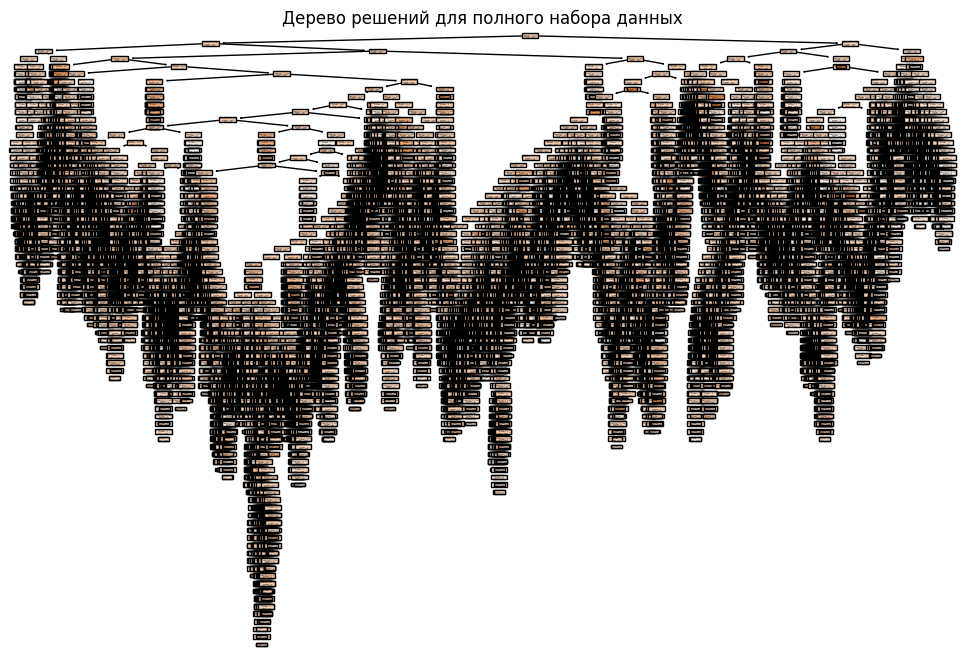

In [ ]:
# Загрузка всего датасета
X_full = california_housing.data
y_full = california_housing.target

# Обучение модели на полном наборе данных
reg_tree_full = DecisionTreeRegressor(random_state=0)
reg_tree_full.fit(X_full[:, 3].reshape(-1, 1), y_full)

# Оценка качества работы модели
y_full_pred = reg_tree_full.predict(X_full[:, 3].reshape(-1, 1))
full_mse = mean_squared_error(y_full, y_full_pred)
full_r2 = r2_score(y_full, y_full_pred)

print(f'Полная средняя квадратичная ошибка: {full_mse:.2f}')
print(f'Полный коэффициент детерминации (R^2): {full_r2:.2f}')

# Визуализация дерева решений для полного набора данных
plt.figure(figsize=(12, 8))
plot_tree(reg_tree_full, filled=True, feature_names=['AveBedrms'], impurity=False)
plt.title('Дерево решений для полного набора данных')
plt.show()


# Контрольные вопросы

## 1. Почему граница принятия решений у деревьев решений имеет такую характерную форму?

Граница принятия решений у деревьев решений имеет кусочную форму из-за того, что дерево разбивает пространство признаков на прямоугольные области. Каждый узел дерева представляет собой условие, основанное на значении одного из признаков, что создает вертикальные и горизонтальные линии (разделяющие плоскости) в многомерном пространстве. Эти условия приводят к резким изменениям в предсказаниях модели, что и формирует характерные "ступенчатые" границы между классами или значениями.

## 2. Как глубина дерева влияет на сложность модели?

Глубина дерева напрямую влияет на его сложность:
- **Мелкие деревья (глубина 1-3)**. Меньшая глубина приводит к более простым моделям, которые могут плохо адаптироваться к данным (недообучение), что делает их менее гибкими и может приводить к высоким ошибкам на обучающих данных.
- **Глубокие деревья (глубина 5 и более)**. Более глубокие деревья способны моделировать сложные зависимости в данных и могут хорошо адаптироваться к обучающим данным. Однако это также увеличивает риск переобучения, когда модель слишком хорошо запоминает обучающие данные и теряет способность обобщать на новые, невидимые данные.

## 3. Почему глубина дерева на разных ветках может быть разная?

Глубина дерева может различаться на разных ветках из-за процесса "обрезки" (pruning) или различных условий, которые применяются к узлам. В зависимости от информации, содержащейся в узлах, некоторые ветви могут быть обрезаны раньше, чем другие. Это позволяет дереву сохранять общую структуру, при этом избегая переобучения на конкретных поднаборах данных. Таким образом, глубина может варьироваться, чтобы наиболее эффективно разбираться в сложных или более простых паттернах в данных.

## 4. Что такое критерий в деревьях решений и как он влияет на работу модели?

Критерий в деревьях решений — это функция, используемая для оценки качества разделения данных в узле. Наиболее распространенные критерии включают:
- **Энтропия**. Измеряет уровень беспорядка в данных; используется в ID3 и C4.5.
- **Индекс Джини**. Используется в CART; измеряет вероятность неправильной классификации случайно выбранного элемента.
  
Критерий влияет на работу модели, так как он определяет, как дерево будет разделять данные на узлы. Выбор подходящего критерия может существенно изменить производительность модели, так как он влияет на то, какие условия будут применяться для формирования узлов и, соответственно, на то, как модель будет обобщать данные.


# Дополнительные задания


## 1. Проверьте работу модели на ненормализованных данных с очень разной величиной. Сделайте вывод о применимости модели дерева решений без нормализации

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target

# Создание ненормализованных данных
X_nonnormalized = np.hstack([X, np.random.rand(X.shape[0], 2) * 1000])  # Добавляем столбцы с большими значениями

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_nonnormalized, y, test_size=0.2, random_state=42)

# Обучение модели дерева решений
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность ненормализованных данных: {accuracy:.2f}')


Точность ненормализованных данных: 0.97


Модель дерева решений может работать с ненормализованными данными. Однако наличие признаков с сильно различающимися величинами может привести к тому, что модель будет больше полагаться на эти признаки с большими значениями, что может исказить результат. В целом, для повышения точности и улучшения интерпретируемости модели нормализация данных является хорошей практикой.

## 2. Примените дерево решений на большом датасете (не менее 10 000 строк и 10 столбцов) по вашему выбору.


In [ ]:
from sklearn.datasets import fetch_california_housing

# Загрузка данных
data = fetch_california_housing()
X_large = data.data
y_large = data.target

# Разделение на обучающую и тестовую выборки
X_train_large, X_test_large, y_train_large, y_test_large = train_test_split(X_large, y_large, test_size=0.2, random_state=42)

# Обучение модели дерева решений
model_large = DecisionTreeRegressor(random_state=42)
model_large.fit(X_train_large, y_train_large)

# Прогнозирование
y_pred_large = model_large.predict(X_test_large)

# Оценка качества работы модели
accuracy_large = mean_squared_error(y_test_large, y_pred_large)
print(f'Среднеквадратичная ошибка в наборе данных по жилью в Калифорнии: {accuracy_large:.2f}')


Среднеквадратичная ошибка в наборе данных по жилью в Калифорнии: 0.50


## 3. Повторите моделирование с другим критерием. Найдите датасеты, на которых лучше работают разные критерии.


In [ ]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier

# Загрузка данных
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

# Разделение на обучающую и тестовую выборки
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

# Обучение модели дерева решений с критерием Gini
model_wine = DecisionTreeClassifier(criterion='gini', random_state=42)
model_wine.fit(X_train_wine, y_train_wine)

# Прогнозирование
y_pred_wine = model_wine.predict(X_test_wine)

# Оценка качества работы модели
accuracy_wine = accuracy_score(y_test_wine, y_pred_wine)
print(f'Точность набора данных о вине с помощью Gini: {accuracy_wine:.2f}')


Точность набора данных о вине с помощью Gini: 0.94


## 4. Используйте на первом датасете вместо деревьев решений случайный лес. Визуализируйте его границу принятия решений.


Accuracy on Wine dataset with Random Forest: 1.00


<ipython-input-66-863546f2fb1d>:35: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test_vis, edgecolor='k', marker='x', s=100, label='Test')


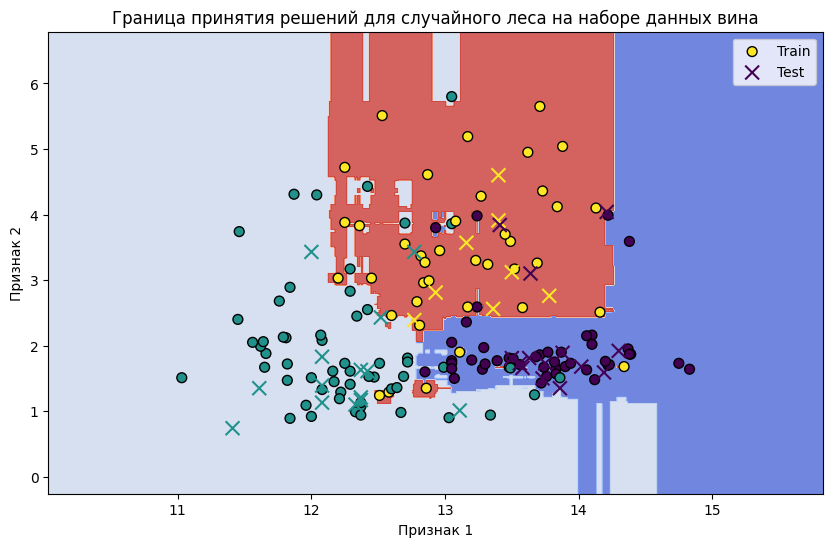

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Обучение модели случайного леса
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_wine, y_train_wine)

# Прогнозирование
y_pred_rf = rf_model.predict(X_test_wine)

# Оценка качества работы модели
accuracy_rf = accuracy_score(y_test_wine, y_pred_rf)
print(f'Accuracy on Wine dataset with Random Forest: {accuracy_rf:.2f}')

# Визуализация границы принятия решений
# Для визуализации будем использовать только первые два признака
X_vis = X_wine[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_wine, test_size=0.2, random_state=42)

# Обучаем модель на двух признаках
rf_model_vis = RandomForestClassifier(random_state=42)
rf_model_vis.fit(X_train_vis, y_train_vis)

# Создание сетки для визуализации границ
xx, yy = np.meshgrid(np.arange(X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1, 0.01),
                     np.arange(X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1, 0.01))

# Прогнозирование на сетке
Z = rf_model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Визуализация границы принятия решений
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, edgecolor='k', marker='o', s=50, label='Train')
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test_vis, edgecolor='k', marker='x', s=100, label='Test')
plt.title('Граница принятия решений для случайного леса на наборе данных вина')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()
